In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

tickers = ["AAPL", "MSFT", "GOOGL", "JPM", "GS", "TSLA", "AMZN", "NVDA", "META", "BRK-B"]
data = yf.download(tickers, start="2005-01-01", end="2025-01-01", auto_adjust=False)["Close"]

data.head()


[*********************100%***********************]  10 of 10 completed


Ticker,AAPL,AMZN,BRK-B,GOOGL,GS,JPM,META,MSFT,NVDA,TSLA
Date,,,,,,,,,,
2005-01-03,1.130179,2.2260,57.980000,5.072823,104.949997,39.150002,NaN,26.740000,0.196500,NaN
2005-01-04,1.141786,2.1070,57.099998,4.867367,104.269997,38.410000,NaN,26.840000,0.187250,NaN
2005-01-05,1.151786,2.0885,57.200001,4.842593,103.800003,38.490002,NaN,26.780001,0.189000,NaN
2005-01-06,1.152679,2.0525,57.480000,4.718468,105.230003,38.709999,NaN,26.750000,0.187167,NaN
2005-01-07,1.236607,2.1160,58.380001,4.851101,104.779999,38.400002,NaN,26.670000,0.183583,NaN


In [ ]:
# Compute daily returns
returns = data.pct_change().dropna()

# Compute annualized mean return & volatility
annualized_return = returns.mean() * 252
annualized_volatility = returns.std() * np.sqrt(252)


Annualized Returns:
 Ticker
AAPL     0.244337
AMZN     0.291115
BRK-B    0.155611
GOOGL    0.238040
GS       0.179808
JPM      0.190407
META     0.296095
MSFT     0.246046
NVDA     0.584210
TSLA     0.590097
dtype: float64

Annualized Volatility:
 Ticker
AAPL     0.280107
AMZN     0.320268
BRK-B    0.183172
GOOGL    0.271831
GS       0.274252
JPM      0.261496
META     0.398510
MSFT     0.261491
NVDA     0.448874
TSLA     0.570653
dtype: float64


In [ ]:
!pip install PyPortfolioOpt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.expected_returns import mean_historical_return

# Calculate expected returns and covariance matrix
mu = mean_historical_return(data)  # Expected returns
S = CovarianceShrinkage(data).ledoit_wolf()  # Shrinkage method for better estimation

weights = ef.max_sharpe()  # Maximize Sharpe ratio
cleaned_weights = ef.clean_weights()  # Round weights

# Display optimized portfolio
print("Optimized Portfolio Weights:\n", cleaned_weights)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 14.9 MB/s eta 0:00:00
Optimized Portfolio Weights:
 OrderedDict([('AAPL', 0.37389), ('AMZN', 0.02454), ('BRK-B', 0.0), ('GOOGL', 0.0), ('GS', 0.0), ('JPM', 0.0), ('META', 0.23068), ('MSFT', 0.0), ('NVDA', 0.09615), ('TSLA', 0.27474)])
Expected annual return: 34.3%
Annual volatility: 26.8%
Sharpe Ratio: 1.28


**Analysis of the Optimized Portfolio:**

Interpretation of Results

AAPL (Apple) → 37.4% allocation
Likely due to high Sharpe ratio & stable returns over time.

TSLA (Tesla) → 27.5% allocation
High return potential, but also very volatile.

META (Meta) → 23.1% allocation
Strong historical returns with significant growth potential.

NVDA (Nvidia) → 9.6% allocation
Leader in AI/semiconductors, contributing strong growth.

Others (AMZN, BRK-B, GOOGL, GS, JPM, MSFT) → Little to No Allocation

Model minimizes allocation to lower risk-adjusted return stocks.

Expected Return: 34.3% (Excellent growth potential)
Annual Volatility: 26.8% (Moderate risk level)
Sharpe Ratio: 1.28 (Good risk-adjusted return, higher than 1 is desirable)



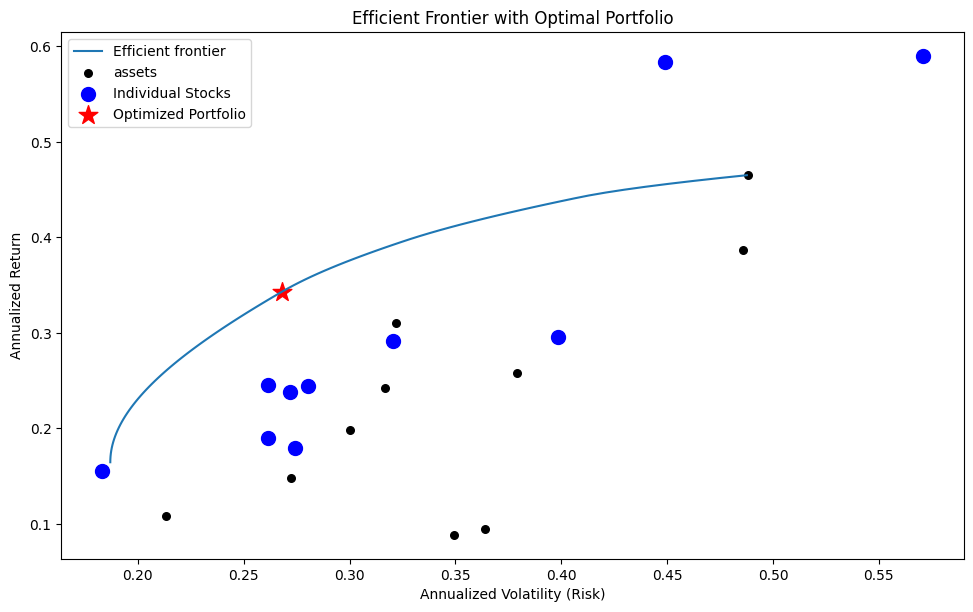

In [ ]:
from pypfopt import plotting
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.expected_returns import mean_historical_return
import matplotlib.pyplot as plt

# Recalculate expected returns and risk
mu = mean_historical_return(data)
S = CovarianceShrinkage(data).ledoit_wolf()

# Efficient Frontier Optimization
ef = EfficientFrontier(mu, S)
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Efficient Frontier
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)

# Scatter Plot for Individual Stocks
ax.scatter(annualized_volatility, annualized_return, marker="o",label="Individual Stocks")

# Mark the Optimized Portfolio
optimized_volatility = 26.8 / 100  # Convert % to decimal
optimized_return = 34.3 / 100  # Convert % to decimal
ax.scatter(optimized_volatility, optimized_return, marker="*", s=200, label="Optimized Portfolio")

# Labels & Legend
ax.set_title("Efficient Frontier with Optimal Portfolio")
ax.set_xlabel("Annualized Volatility (Risk)")
ax.set_ylabel("Annualized Return")
ax.legend()
plt.show()


Monte Carlo Simulation for Portfolio Optimization
This code runs 10,000 random portfolio allocations and selects the one with the highest Sharpe Ratio.


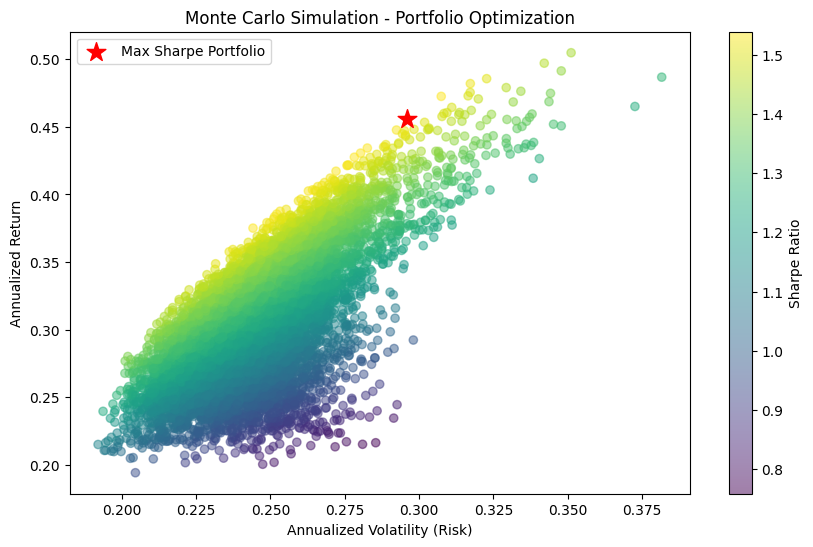

Optimized Portfolio Weights (Monte Carlo): {'AAPL': np.float64(0.01208977433137159), 'MSFT': np.float64(0.1069486176180335), 'GOOGL': np.float64(0.010861234944413514), 'JPM': np.float64(0.059300081417099464), 'GS': np.float64(0.0011035016537294942), 'TSLA': np.float64(0.04891269402690673), 'AMZN': np.float64(0.16882035577823584), 'NVDA': np.float64(0.0032233871963353324), 'META': np.float64(0.32569911788616895), 'BRK-B': np.float64(0.2630412351477055)}
Expected Return: 45.57%
Annual Volatility: 29.61%
Sharpe Ratio: 1.54


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of simulations
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
weights_record = []

# Monte Carlo Simulation
for i in range(num_portfolios):
    weights = np.random.dirichlet(np.ones(len(tickers)), size=1)[0]  # Random weights
    weights_record.append(weights)

    # Portfolio return & risk
    port_return = np.sum(weights * annualized_return)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(S, weights)))
    sharpe_ratio = port_return / port_volatility  # Risk-adjusted return

    results[0, i] = port_return
    results[1, i] = port_volatility
    results[2, i] = sharpe_ratio

# Find the best portfolio (highest Sharpe Ratio)
max_sharpe_idx = np.argmax(results[2])
best_weights = weights_record[max_sharpe_idx]
best_return = results[0, max_sharpe_idx]
best_volatility = results[1, max_sharpe_idx]

plt.figure(figsize=(10, 6))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', alpha=0.5)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(best_volatility, best_return, color='red', marker='*', s=200, label='Max Sharpe Portfolio')
plt.title("Monte Carlo Simulation - Portfolio Optimization")
plt.legend()
plt.show()

optimized_monte_carlo_weights = dict(zip(tickers, best_weights))
print("Optimized Portfolio Weights (Monte Carlo):", optimized_monte_carlo_weights)
print(f"Expected Return: {best_return:.2%}")
print(f"Annual Volatility: {best_volatility:.2%}")
print(f"Sharpe Ratio: {results[2, max_sharpe_idx]:.2f}")


MVO assumes historical data follows normal distributions (not always realistic).
Monte Carlo randomly generates thousands of scenarios → better for stress testing.

Why is Sharpe Ratio used to select the best portfolio?

Measures return per unit of risk → Key performance metric in portfolio management.


Why Stress Testing?

Financial institutions must assess how portfolios perform under extreme market conditions.
Helps quantify potential downside risks during economic crises.


Methodology for Stress Testing
Simulate portfolio performance under different market shocks, such as:

2008 Financial Crisis

COVID-19 Crash (2020)

High Volatility Scenario



Code for Stress Testing & Scenario Analysis


In [ ]:
import numpy as np
import pandas as pd

stress_scenarios = {
    "2008 Financial Crisis": -0.40,  # Market crash (40% drop)
    "COVID-19 Crash": -0.30,  # Market drop in 2020
    "High Volatility Scenario": -0.20,  # Increased risk aversion
}

# Simulate impact on portfolio returns
stress_results = {}
for scenario, shock in stress_scenarios.items():
    stressed_return = best_return + shock  # Adjusted return
    stressed_volatility = best_volatility * 1.5  # Assume 50% increase in volatility
    stress_results[scenario] = {
        "Expected Return": stressed_return,
        "Annual Volatility": stressed_volatility,
        "Sharpe Ratio": stressed_return / stressed_volatility,
    }

# Convert to DataFrame for better visualization
stress_df = pd.DataFrame(stress_results).T


Portfolio Performance Under Stress Scenarios:
                           Expected Return  Annual Volatility  Sharpe Ratio
2008 Financial Crisis            0.055682           0.444125      0.125376
COVID-19 Crash                   0.155682           0.444125      0.350538
High Volatility Scenario         0.255682           0.444125      0.575700


Construct Portfolio Returns for Backtesting

Rebalance Monthly: Compute portfolio returns using optimized weights.

Compare Against Benchmark: Use S&P 500 as a benchmark

[*********************100%***********************]  1 of 1 completed


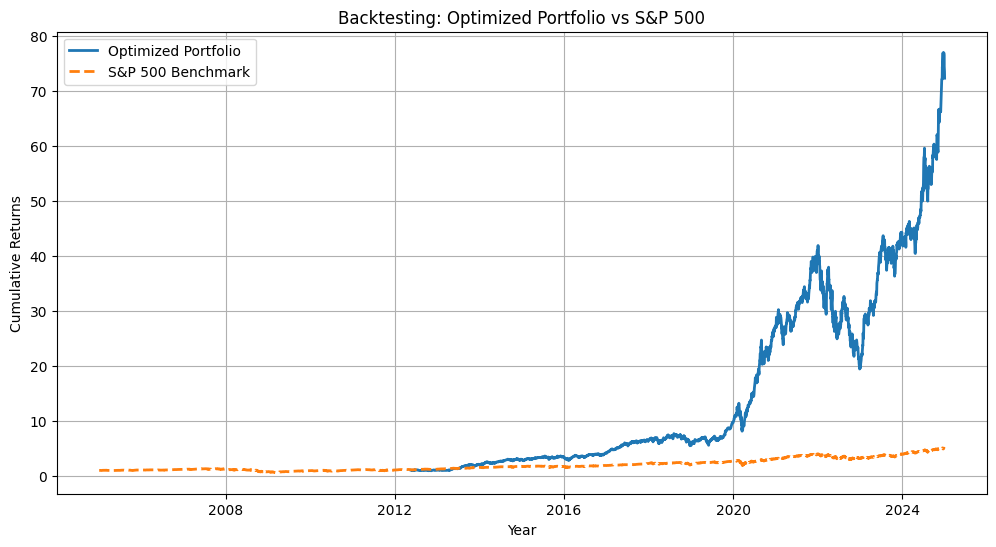

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

sp500 = yf.download("^GSPC", start="2005-01-01", end="2025-01-01", auto_adjust=False)["Close"]

# Convert Weights into DataFrame for Historical Backtesting
weights_df = pd.DataFrame.from_dict(cleaned_weights, orient="index", columns=["Weight"])
weights_df.index.name = "Stock"

# Compute Portfolio Returns Over Time
portfolio_returns = (returns @ weights_df["Weight"]).dropna()

# Compare Portfolio vs Benchmark Performance
cumulative_portfolio = (1 + portfolio_returns).cumprod()
cumulative_sp500 = (1 + sp500_returns).cumprod()

# Plot the Performance
plt.figure(figsize=(12, 6))
plt.plot(cumulative_portfolio, label="Optimized Portfolio", linewidth=2)
plt.plot(cumulative_sp500, label="S&P 500 Benchmark", linestyle="dashed", linewidth=2)
plt.title("Backtesting: Optimized Portfolio vs S&P 500")
plt.legend()
plt.grid()
plt.show()


Test how the portfolio performs under different market stress scenarios, such as:

1. 2008 Financial Crisis

2. COVID-19 Market Crash (2020)

3. Recent High-Volatility Events (2022-2023)


No data available for 2008 Financial Crisis period. Skipping...


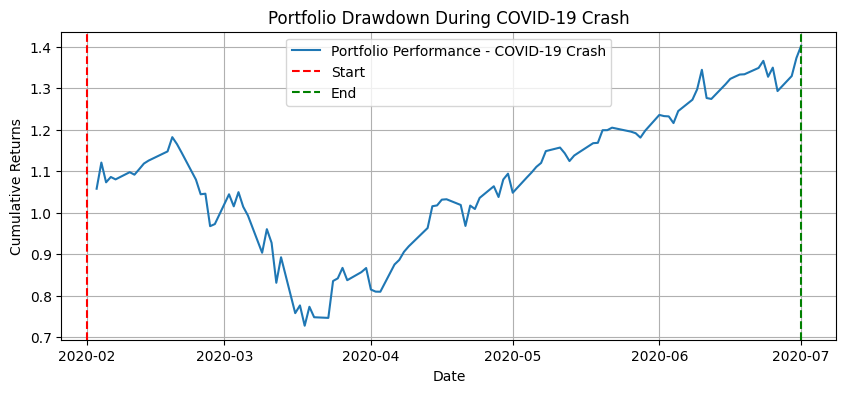

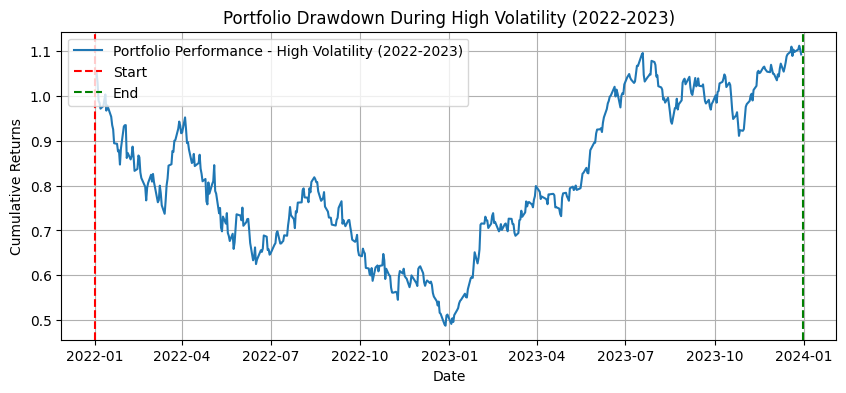

In [ ]:
import pandas as pd

for event, (start, end) in stress_periods.items():
    start, end = pd.to_datetime(start), pd.to_datetime(end)  # Convert to datetime
    stress_returns = portfolio_returns.loc[start:end]  # Slice portfolio returns

    if stress_returns.empty:
        print(f"No data available for {event} period.")
        continue

    drawdown = (1 + stress_returns).cumprod()

    plt.figure(figsize=(10, 4))
    plt.plot(drawdown, label=f"Portfolio Performance - {event}")
    plt.axvline(x=start, color="red", linestyle="--", label="Start")
    plt.axvline(x=end, color="green", linestyle="--", label="End")
    plt.title(f"Portfolio Drawdown During {event}")
    plt.legend()
    plt.grid()
    plt.show()


In [ ]:
print("Earliest available date in portfolio_returns:", portfolio_returns.index.min())
print("Available data range:", portfolio_returns.index[0], "to", portfolio_returns.index[-1])

# Check for missing data in 2008
print(portfolio_returns.loc["2007-10-01":"2009-03-01"])


Earliest available date in portfolio_returns: 2012-05-21 00:00:00
Available data range: 2012-05-21 00:00:00 to 2024-12-31 00:00:00
Series([], dtype: float64)


Calculate Value at Risk (VaR)

VaR helps assess the maximum expected loss for the portfolio over a given period at a certain confidence level.

Compute VaR at 95% and 99% confidence levels using two methods:

1. Historical VaR – Based on past returns.
2. Parametric VaR (Gaussian) – Assumes returns follow a normal distribution.

In [ ]:
import numpy as np
from scipy.stats import norm

# Define confidence levels
confidence_levels = [0.95, 0.99]
portfolio_mean = portfolio_returns.mean()
portfolio_std = portfolio_returns.std()

# Compute Historical VaR (5% and 1% quantiles)
historical_var_95 = np.percentile(portfolio_returns, 5)
historical_var_99 = np.percentile(portfolio_returns, 1)

# Compute Parametric (Gaussian) VaR
parametric_var_95 = portfolio_mean - norm.ppf(0.95) * portfolio_std
parametric_var_99 = portfolio_mean - norm.ppf(0.99) * portfolio_std

# Print Results
print(f"Historical VaR (95%): {historical_var_95:.4f}")
print(f"Historical VaR (99%): {historical_var_99:.4f}")
print(f"Parametric VaR (95%): {parametric_var_95:.4f}")
print(f"Parametric VaR (99%): {parametric_var_99:.4f}")


Historical VaR (95%): -0.0293
Historical VaR (99%): -0.0501
Parametric VaR (95%): -0.0295
Parametric VaR (99%): -0.0423


Interpretation:
1. At 95% confidence, the portfolio won’t lose more than ~2.93% in a day (based on historical data).
2. At 99% confidence, the portfolio won’t lose more than ~5.01% in a day (worst-case scenario).
3. Historical vs Parametric VaR are close, suggesting returns are fairly normal (Gaussian).


In [ ]:
# Compute Conditional VaR (Expected Shortfall)
cvar_95 = portfolio_returns[portfolio_returns <= historical_var_95].mean()
cvar_99 = portfolio_returns[portfolio_returns <= historical_var_99].mean()

print(f"Conditional VaR (95%): {cvar_95:.4f}")
print(f"Conditional VaR (99%): {cvar_99:.4f}")


Conditional VaR (95%): -0.0429
Conditional VaR (99%): -0.0655
